# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Keras imports
from tensorflow.keras.utils import to_categorical

In [2]:
from book_cover.ml_logic.data import get_data

# Raw images

In [3]:
train_x = get_data("../raw_data/train_x.csv")
test_x = get_data("../raw_data/test_x.csv")

In [4]:
train_x.shape, test_x.shape

((51300, 2), (5700, 2))

# Raw images preprocessing

In [5]:
from book_cover.ml_logic.preprocessor import preprocess_images

In [6]:
X_train_half_pp = preprocess_images(train_x, (224, 224))
X_test_half_pp = preprocess_images(test_x, (224, 224))

In [7]:
X_train_half_pp.shape, X_test_half_pp.shape

((51300, 224, 224, 3), (5700, 224, 224, 3))

In [8]:
# Saving images as arrays
np.save("../raw_data/Images_temp/X_train_half_pp", X_train_half_pp)
np.save("../raw_data/Images_temp/X_test_half_pp", X_test_half_pp)

# Raw labels

In [9]:
y_train = get_data("../raw_data/train_y.csv")
y_test = get_data("../raw_data/test_y.csv")

In [20]:
y_train.shape, y_test.shape

((51300, 2), (5700, 2))

# Raw labels preprocessed

In [18]:
# Encoding the labels
y_train_pp = to_categorical(y_train['Genre_id'])
y_test_pp = to_categorical(y_test['Genre_id'])

In [21]:
# Saving as arrays
np.save("../raw_data/Images_temp/y_train_pp", y_train_pp)
np.save("../raw_data/Images_temp/y_test_pp", y_test_pp)

# Dataset to work with

In [22]:
X_train_half_pp = np.load("../raw_data/Images_temp/X_train_half_pp.npy")
X_test_half_pp = np.load("../raw_data/Images_temp/X_test_half_pp.npy")
y_train_pp = np.load("../raw_data/Images_temp/y_train_pp.npy")
y_test_pp = np.load("../raw_data/Images_temp/y_test_pp.npy")

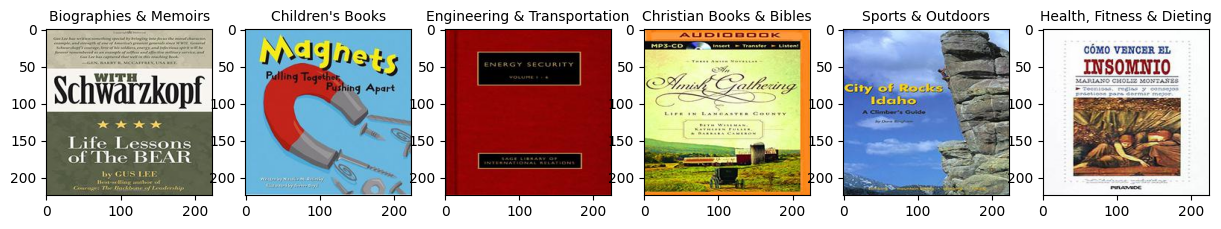

In [12]:
# Let's plot few images to see what they look like
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = X_train_half_pp[i]
    label = y_train['Genre_name'][i]
    plt.imshow(img)
    plt.title(label, fontsize=10)

# Subset

In [23]:
# Considering only 1/10th of the 50K+ images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(X_train_half_pp), round(len(X_train_half_pp)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(X_test_half_pp), round(len(X_test_half_pp)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
X_train_half_pp_small = X_train_half_pp[idx_train]
X_test_half_pp_small = X_test_half_pp[idx_test]

# and their corresponding labels
y_train_pp_small = y_train_pp[idx_train]
y_test_pp_small = y_test_pp[idx_test]

X_train_half_pp_small.shape, X_test_half_pp_small.shape

((5130, 224, 224, 3), (570, 224, 224, 3))

In [24]:
X_train_pp_small = images_train_small / 255.
X_test_pp_small = images_test_small / 255.

In [25]:
# Saving data to train the CNN on Colab
np.save("../raw_data/Images_temp/y_train_pp_small", y_train_pp_small)
np.save("../raw_data/Images_temp/y_test_pp_small", y_test_pp_small)
np.save("../raw_data/Images_temp/X_train_pp_small", X_train_pp_small)
np.save("../raw_data/Images_temp/X_test_pp_small", X_test_pp_small)